In [24]:
from lib import *

In [25]:
from mnist import MNIST
mndata = MNIST('./data_mnist')
images, labels = mndata.load_training()

In [26]:
import numpy as np

In [27]:
x = np.array(images)

In [28]:
y = np.array(labels)

In [29]:
def one_hot_encoded(y, num_class):
    n = y.shape[0]
    onehot = np.zeros((n, num_class), dtype="int32")
    for i in range(n):
        idx = y[i]
        onehot[i][idx] = 1
    return onehot

y = one_hot_encoded(y, 10)

In [30]:
scaler = preprocessing.scalers.MinMaxScaler()

x = scaler.fit_transform(x)

In [31]:
train_x, train_y, test_x, text_y =  preprocessing.cross_validation.train_test_split(x, y, 10000)

In [37]:
net = models.Model()

net.add_layer(layers.linear.LinearLayer((784, 100), b_initial=0, w_init='xavier_normal'))
net.add_layer(layers.activations.Tanh((100, 100)))
net.add_layer(layers.linear.LinearLayer((100, 100) , b_initial=0, w_init='xavier_normal'))
net.add_layer(layers.activations.Tanh((100, 100)))
net.add_layer(layers.linear.LinearLayer((100, 10) , b_initial=0, w_init='xavier_normal'))
net.add_layer(layers.activations.Softmax((10, 10)))
net.set_loss(layers.loss.CrossEntropy((10, 1)))
net.build()

optimizer = train.OptimizatonFabric(
    gen=train.StochasticBatchGenerator, 
    updater=train.GradientDecent,
    updater_cfg={'eta': 0.1},
    generator_cfg={'batch_size': 1000}, 
    callbacks=[
        train.EpochInfo(
            validate=True, 
            metric=preprocessing.cross_validation.class_accuracy)
    ]
)

optimizer.train(net, train_x, train_y, x_val=test_x, y_val=text_y, min_eps=0.0000005, max_iter=2000)

Epoch 1: [Train] loss=2.165079969018818 | metric=0.226 [Test] loss=2.185314443813968 | metric=0.2125
Epoch 101: [Train] loss=0.4323136834824008 | metric=0.892 [Test] loss=0.44857300387997295 | metric=0.8822
Epoch 201: [Train] loss=0.3573810927724533 | metric=0.9 [Test] loss=0.3629134786161984 | metric=0.897
Epoch 301: [Train] loss=0.3112973765966429 | metric=0.921 [Test] loss=0.3284966559015201 | metric=0.9039
Epoch 401: [Train] loss=0.2685376337941349 | metric=0.928 [Test] loss=0.3050986846921595 | metric=0.9116
Epoch 501: [Train] loss=0.24904280077631777 | metric=0.938 [Test] loss=0.28871047149423584 | metric=0.917
Epoch 601: [Train] loss=0.1847178233242445 | metric=0.948 [Test] loss=0.27452264193639514 | metric=0.9213
Epoch 701: [Train] loss=0.24251861132360045 | metric=0.93 [Test] loss=0.26168333564855395 | metric=0.9238
Epoch 801: [Train] loss=0.2126065431519222 | metric=0.946 [Test] loss=0.24942432525274452 | metric=0.9278
Epoch 901: [Train] loss=0.21748896529649783 | metric=0.93

In [50]:
obj = 132

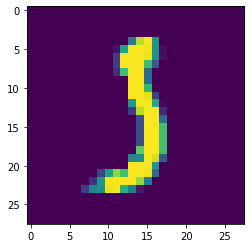

In [51]:
import matplotlib.pyplot as plt

plt.imshow(x[obj].reshape((28, 28)))

In [52]:
y[obj]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int32)

In [53]:
net.predict(
    np.array([x[obj]])
)

array([[2.33289646e-04, 5.26104096e-01, 4.98662284e-03, 4.16830457e-01,
        1.90483524e-05, 3.89559334e-03, 6.17847970e-04, 3.71953778e-03,
        3.06325356e-02, 1.29609707e-02]])